In [62]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from keras.datasets import mnist, fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [63]:
# Carregando os datasets
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()

In [64]:
# Normalizando os dados
x_train_mnist = x_train_mnist.astype('float32') / 255.
x_test_mnist = x_test_mnist.astype('float32') / 255.
x_train_fashion = x_train_fashion.astype('float32') / 255.
x_test_fashion = x_test_fashion.astype('float32') / 255.

In [65]:
# Adicionando ruído
noise_factor = 0.5
x_train_mnist_noisy = x_train_mnist + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_mnist.shape)
x_test_mnist_noisy = x_test_mnist + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_mnist.shape)
x_train_fashion_noisy = x_train_fashion + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_fashion.shape)
x_test_fashion_noisy = x_test_fashion + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_fashion.shape)

In [66]:
# Achatar as imagens
x_train_mnist = x_train_mnist.reshape((len(x_train_mnist), np.prod(x_train_mnist.shape[1:])))
x_test_mnist = x_test_mnist.reshape((len(x_test_mnist), np.prod(x_test_mnist.shape[1:])))
x_train_fashion = x_train_fashion.reshape((len(x_train_fashion), np.prod(x_train_fashion.shape[1:])))
x_test_fashion = x_test_fashion.reshape((len(x_test_fashion), np.prod(x_test_fashion.shape[1:])))

x_train_mnist_noisy = x_train_mnist_noisy.reshape((len(x_train_mnist_noisy), np.prod(x_train_mnist_noisy.shape[1:])))
x_test_mnist_noisy = x_test_mnist_noisy.reshape((len(x_test_mnist_noisy), np.prod(x_test_mnist_noisy.shape[1:])))
x_train_fashion_noisy = x_train_fashion_noisy.reshape((len(x_train_fashion_noisy), np.prod(x_train_fashion_noisy.shape[1:])))
x_test_fashion_noisy = x_test_fashion_noisy.reshape((len(x_test_fashion_noisy), np.prod(x_test_fashion_noisy.shape[1:])))

In [67]:
# Convertendo para tensores do PyTorch
x_train_mnist = torch.from_numpy(x_train_mnist)
x_test_mnist = torch.from_numpy(x_test_mnist)
y_train_mnist = torch.from_numpy(y_train_mnist)
y_test_mnist = torch.from_numpy(y_test_mnist)


x_train_fashion = torch.from_numpy(x_train_fashion)
x_test_fashion = torch.from_numpy(x_test_fashion)
y_train_fashion = torch.from_numpy(y_train_fashion)
y_test_fashion = torch.from_numpy(y_test_fashion)


<ipython-input-67-e4b9cfc7da71>:10: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  y_train_fashion = torch.from_numpy(y_train_fashion)


In [68]:
# Definindo o modelo do Autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 32),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 784),
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

Abaixo, tem comentários no código para utiliza o MNIST ou o Fashion Mnist


In [69]:
# Treinando o Autoencoder
autoencoder = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.RMSprop(autoencoder.parameters(), lr=0.001)

for epoch in range(100):
    optimizer.zero_grad()
    outputs = autoencoder(x_train_fashion)
    loss = criterion(outputs, x_train_fashion)
    # outputs = autoencoder(x_train_mnist)
    # loss = criterion(outputs, x_train_mnist)
    print('Epoch:', epoch+1, 'Loss:', loss.item())
    loss.backward()
    optimizer.step()

Epoch: 1 Loss: 0.17054907977581024
Epoch: 2 Loss: 0.16270709037780762
Epoch: 3 Loss: 0.12384258210659027
Epoch: 4 Loss: 0.11605387926101685
Epoch: 5 Loss: 0.11496607214212418
Epoch: 6 Loss: 0.10288136452436447
Epoch: 7 Loss: 0.09653152525424957
Epoch: 8 Loss: 0.09307558089494705
Epoch: 9 Loss: 0.0921977236866951
Epoch: 10 Loss: 0.09139695018529892
Epoch: 11 Loss: 0.09106087684631348
Epoch: 12 Loss: 0.09063612669706345
Epoch: 13 Loss: 0.09039582312107086
Epoch: 14 Loss: 0.08937809616327286
Epoch: 15 Loss: 0.08847697079181671
Epoch: 16 Loss: 0.08699412643909454
Epoch: 17 Loss: 0.08535929769277573
Epoch: 18 Loss: 0.08364693075418472
Epoch: 19 Loss: 0.08489170670509338
Epoch: 20 Loss: 0.07687405496835709
Epoch: 21 Loss: 0.07232639938592911
Epoch: 22 Loss: 0.06981736421585083
Epoch: 23 Loss: 0.06852895766496658
Epoch: 24 Loss: 0.06897924840450287
Epoch: 25 Loss: 0.07122309505939484
Epoch: 26 Loss: 0.07095222920179367
Epoch: 27 Loss: 0.06784940510988235
Epoch: 28 Loss: 0.06574807316064835
Ep

In [49]:
# Criando o modelo DNN
class DNN(nn.Module):
    def __init__(self, autoencoder):
        super(DNN, self).__init__()
        self.encoder = autoencoder.encoder
        self.classifier = nn.Sequential(
            nn.Linear(32, 10),
            nn.Softmax(dim=1))

    def forward(self, x):
        x = self.encoder(x)
        x = self.classifier(x)
        return x

In [70]:
# Treinando o modelo DNN com 500 imagens aleatórias
dnn = DNN(autoencoder)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(autoencoder.parameters(), lr=0.001)

# indices = np.random.randint(x_train_mnist.shape[0], size=500) #x_train_fashion
indices = np.random.randint(x_train_fashion.shape[0], size=500)

# x_train_mnist_500 = x_train_mnist[indices]
# y_train_mnist_500 = y_train_mnist[indices]

x_train_fashion_500 = x_train_fashion[indices]
y_train_fashion_500 = y_train_fashion[indices]

for epoch in range(10000):
    optimizer.zero_grad()
    # outputs = dnn(x_train_mnist_500)
    # loss = criterion(outputs, y_train_mnist_500)

    outputs = dnn(x_train_fashion_500)
    loss = criterion(outputs, y_train_fashion_500)

    print('Epoch:', epoch+1, 'Loss:', loss.item())
    loss.backward()
    optimizer.step()


A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch: 5001 Loss: 1.5064384937286377
Epoch: 5002 Loss: 1.5063222646713257
Epoch: 5003 Loss: 1.5063389539718628
Epoch: 5004 Loss: 1.5064412355422974
Epoch: 5005 Loss: 1.5064492225646973
Epoch: 5006 Loss: 1.5063743591308594
Epoch: 5007 Loss: 1.5064390897750854
Epoch: 5008 Loss: 1.5062904357910156
Epoch: 5009 Loss: 1.506412386894226
Epoch: 5010 Loss: 1.506356120109558
Epoch: 5011 Loss: 1.5064562559127808
Epoch: 5012 Loss: 1.506385087966919
Epoch: 5013 Loss: 1.506306767463684
Epoch: 5014 Loss: 1.5063375234603882
Epoch: 5015 Loss: 1.506417155265808
Epoch: 5016 Loss: 1.5064442157745361
Epoch: 5017 Loss: 1.5063273906707764
Epoch: 5018 Loss: 1.5064183473587036
Epoch: 5019 Loss: 1.5064455270767212
Epoch: 5020 Loss: 1.5064135789871216
Epoch: 5021 Loss: 1.5063899755477905
Epoch: 5022 Loss: 1.5063992738723755
Epoch: 5023 Loss: 1.5064177513122559
Epoch: 5024 Loss: 1.5063823461532593
Epoch: 5025 Loss: 1.5064018964767456
Epoch: 5026 Loss: 1.5

Accuracy: 0.7817999720573425


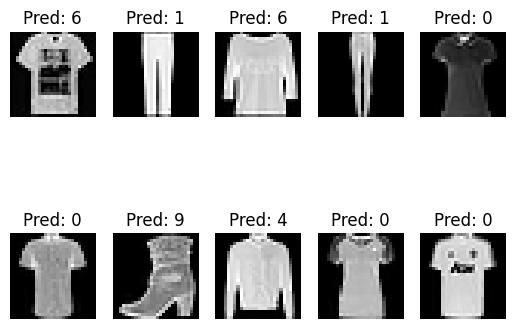

In [71]:
# Obtendo previsões no conjunto de teste


# outputs = dnn(x_test_mnist)
outputs = dnn(x_test_fashion)
_, predicted = torch.max(outputs.data, 1)

# Calculando a acurácia

# accuracy = (predicted == y_test_mnist).float().mean()
accuracy = (predicted == y_test_fashion).float().mean()
print('Accuracy:', accuracy.item())

# Selecionando algumas imagens aleatórias do conjunto de teste

# indices = np.random.randint(x_test_mnist.shape[0], size=10)
# images = x_test_mnist[indices]
# labels = y_test_mnist[indices]

indices = np.random.randint(x_test_fashion.shape[0], size=10)
images = x_test_fashion[indices]
labels = y_test_fashion[indices]

predictions = predicted[indices]

# Plotando as imagens com as previsões
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {predictions[i]}')
    plt.axis('off')
plt.show()